In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt   #importing all necessary libraries
%matplotlib inline
import numpy as np

In [14]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()  #loading the dataset and giving it to X_train,y_train,X_test,y_test

In [15]:
len(X_train)

60000

In [16]:
len(X_test)

10000

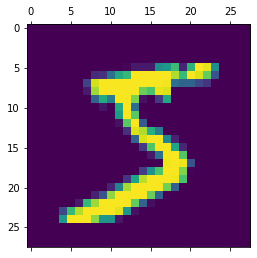

In [23]:
plt.matshow(X_train[0])
#y_train[0]

In [18]:
X_train[0]   #28 X 28 size

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
X_train = X_train / 255  #We Scale down the values so that the range is between 0 & 1...better accuracy also
X_test = X_test / 255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_train_flattened=X_train.reshape(len(X_train),28*28)  #flattening the 2D array to a 1D array...
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [52]:
X_train_flattened.shape  #after flattening

(60000, 784)

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  #Dense meaning- One neuron connected to every other neuron
])                                                  # The output 10 neurons(0-9 digits classification) is connected to input 784 layers.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4890 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3067 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2859 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2751 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.9263


In [28]:
model.evaluate(X_test_flattened,y_test)   #evaluating on testing data

313/313 [==============================] - 1s 3ms/step - loss: 0.2637 - accuracy: 0.9265


[0.26366570591926575, 0.9265000224113464]

In [31]:
y_predicted=model.predict(X_test_flattened)    
y_predicted[0]

array([1.2658102e-05, 1.0360173e-10, 4.0871804e-05, 1.1369586e-02,
       8.9212904e-07, 8.0933045e-05, 9.0443608e-10, 7.7888441e-01,
       7.2008610e-05, 9.8070502e-04], dtype=float32)

In [36]:
np.argmax(y_predicted[0])


7

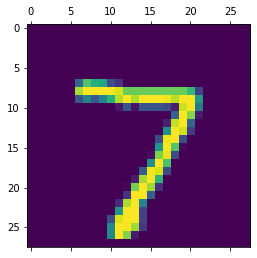

In [35]:
plt.matshow(X_test[0])

In [38]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [39]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    8,  930,   14,    7,    4,   12,   11,   38,    5],
       [   3,    0,   22,  917,    0,   22,    2,   13,   21,   10],
       [   2,    1,    6,    1,  911,    0,    8,    4,   10,   39],
       [   8,    2,    5,   36,   10,  766,   16,    9,   32,    8],
       [  10,    3,    8,    1,    7,   11,  913,    2,    3,    0],
       [   1,    5,   23,    3,    4,    0,    0,  962,    2,   28],
       [   4,    7,    6,   18,    9,   20,   10,   14,  879,    7],
       [   9,    6,    2,   10,   23,    6,    0,   30,    6,  917]])>

Text(69.0, 0.5, 'true_values')

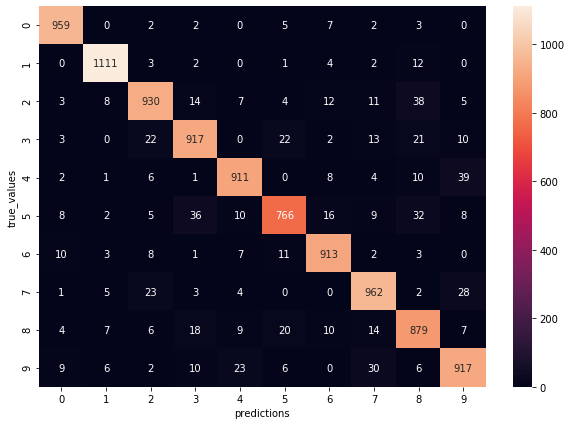

In [44]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predictions')
plt.ylabel('true_values')

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),# addind a hidden layer of 100 neurons
    keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2889 - accuracy: 0.9195
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1369 - accuracy: 0.9600
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0994 - accuracy: 0.9706
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0772 - accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0624 - accuracy: 0.9803


Text(69.0, 0.5, 'true values')

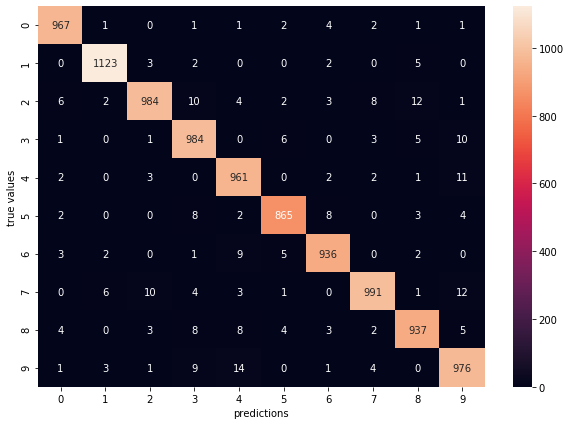

In [49]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predictions')
plt.ylabel('true values')

In [51]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9724


[0.08499836176633835, 0.9724000096321106]